In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = "https://www.screener.in/company/{}/consolidated/"
ticker = input("Enter the ticker name (e.g., ASIANPAINT): ").strip()

url = base_url.format(ticker)

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')


    header_row = soup.find('table').find('thead').find('tr')
    headers = [th.text.strip() for th in header_row.find_all('th')]

    rows = []
    for row in soup.find('table').find('tbody').find_all('tr'):
        cells = row.find_all('td')
        rows.append([cell.text.strip() for cell in cells])

    # Create a DataFrame
    df = pd.DataFrame(rows, columns=headers)


    print(df)
else:
    print(f"Failed to fetch data for {ticker}. HTTP Status Code: {response.status_code}")

Enter the ticker name (e.g., ASIANPAINT):  ASIANPAINT


                      Sep 2021 Dec 2021 Mar 2022 Jun 2022 Sep 2022 Dec 2022  \
0             Sales +    7,096    8,527    7,893    8,607    8,458    8,637   
1          Expenses +    6,192    6,985    6,449    7,051    7,230    7,025   
2    Operating Profit      904    1,542    1,443    1,556    1,228    1,611   
3               OPM %      13%      18%      18%      18%      15%      19%   
4      Other Income +      148       87      -26       88      118      122   
5            Interest       24       27       23       29       35       41   
6        Depreciation      203      208      205      208      216      214   
7   Profit before tax      826    1,394    1,189    1,407    1,094    1,478   
8               Tax %      27%      26%      26%      26%      27%      26%   
9        Net Profit +      605    1,031      874    1,036      804    1,097   
10          EPS in Rs     6.21    10.59     8.87    10.60     8.16    11.18   
11            Raw PDF                               

In [2]:
import requests
import pandas as pd

# NSE NIFTY50 API URL
nifty_url = "https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050"

# Required headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.nseindia.com/"
}

# Initialize a session to manage cookies
session = requests.Session()
session.get("https://www.nseindia.com", headers=headers)  # Initial request to get cookies

# Fetch NIFTY50 data
response = session.get(nifty_url, headers=headers)

if response.status_code == 200:
    # Parse JSON response
    data = response.json()["data"]

    # Convert to a DataFrame
    df = pd.DataFrame(data)

    # Check available columns and filter dynamically
    required_columns = {
        "symbol": "Stock",
        "open": "Open Price",
        "dayHigh": "Day High",
        "dayLow": "Day Low",
        "lastPrice": "Last Traded Price",
        "previousClose": "Previous Close",
        "change": "Change",
        "pChange": "% Change",
        "totalTradedVolume": "Volume",
        "totalTradedValue": "Traded Value",
        "marketCap": "Market Cap"
    }

    available_columns = {col: name for col, name in required_columns.items() if col in df.columns}
    df = df[list(available_columns.keys())]  # Select only available columns
    df.rename(columns=available_columns, inplace=True)

    # Display the data
    print(df)
else:
    print(f"Failed to fetch NIFTY50 data. HTTP Status Code: {response.status_code}")

         Stock  Open Price  Day High   Day Low  Last Traded Price  \
0     NIFTY 50    24498.35  24792.30  24180.80           24768.30   
1   BHARTIARTL     1618.00   1685.00   1606.80            1682.00   
2          ITC      460.00    474.40    451.65             471.00   
3    KOTAKBANK     1758.35   1809.00   1748.05            1804.90   
4   HINDUNILVR     2344.95   2394.55   2333.45            2391.25   
5   ULTRACEMCO    11800.00  12118.50  11730.00           12082.35   
6        TITAN     3420.00   3518.00   3380.25            3511.00   
7    POWERGRID      330.65    334.30    325.05             334.10   
8      HCLTECH     1939.00   1975.00   1912.35            1965.00   
9    NESTLEIND     2225.00   2257.85   2208.25            2255.00   
10      GRASIM     2641.00   2700.00   2620.50            2696.05   
11  ADANIPORTS     1241.95   1262.00   1230.00            1259.70   
12   ICICIBANK     1325.35   1347.15   1313.50            1345.45   
13    HDFCLIFE      625.00    633.

In [3]:
import requests
import pandas as pd

nifty_url = "https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.nseindia.com/"
}

session = requests.Session()
session.get("https://www.nseindia.com", headers=headers)  # Necessary to initialize session

response = session.get(nifty_url, headers=headers)

if response.status_code == 200:
    data = response.json()["data"]
    df = pd.DataFrame(data)
    print(df.head())  # Display the first few rows
else:
    print(f"Failed to fetch NIFTY data. HTTP Status Code: {response.status_code}")

   priority      symbol     identifier      open   dayHigh    dayLow  \
0         1    NIFTY 50       NIFTY 50  24498.35  24792.30  24180.80   
1         0  BHARTIARTL  BHARTIARTLEQN   1618.00   1685.00   1606.80   
2         0         ITC         ITCEQN    460.00    474.40    451.65   
3         0   KOTAKBANK   KOTAKBANKEQN   1758.35   1809.00   1748.05   
4         0  HINDUNILVR  HINDUNILVREQN   2344.95   2394.55   2333.45   

   lastPrice  previousClose  change  pChange  ...    nearWKL  perChange365d  \
0   24768.30       24548.70  219.60     0.89  ... -17.178718          17.31   
1    1682.00        1610.55   71.45     4.44  ... -75.208333          61.07   
2     471.00         460.60   10.40     2.26  ... -17.941655           1.09   
3    1804.90        1768.70   36.20     2.05  ... -16.909026          -3.15   
4    2391.25        2344.95   46.30     1.97  ... -10.091849          -6.65   

   date365dAgo                                      chart365dPath  \
0  13-Dec-2023  https:/

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the list of tickers
tickers = [
    "ADANIGREEN", "ADANIPORTS", "AMBUJACEM", "APOLLOHOSP", "ASIANPAINT", "AXISBANK",
    "BAJAJFINSV", "BAJFINANCE", "BHARTIARTL", "BPCL", "BRITANNIA", "CIPLA", "DIVISLAB",
    "DRREDDY", "EICHERMOT", "GRASIM", "HDFC", "HDFCBANK", "HEROMOTOCO", "HINDALCO",
    "HINDUNILVR", "ICICIBANK", "ITC", "JSWSTEEL", "KOTAKBANK", "LUPIN", "MARUTI", "M&M",
    "NESTLEIND", "NTPC", "ONGC", "POWERGRID", "RELIANCE", "SBIN", "SHREECEM", "SUNPHARMA",
    "TATACONSUM", "TATAMOTORS", "TATAPOWER", "TCS", "TECHM", "TITAN", "ULTRACEMCO", "UPL",
    "WIPRO"
]

# Base URL for Screener.in
base_url = "https://www.screener.in/company/{}/consolidated/"

# Function to fetch data for a single ticker
def fetch_data(ticker):
    url = base_url.format(ticker)
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error fetching data for {ticker}. HTTP Status Code: {response.status_code}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    try:
        metrics = {}
        metrics["Ticker"] = ticker

        # Extracting the Last Traded Price (LTP) from the right place
        ltp_section = soup.find("span", class_="value")
        if ltp_section:
            metrics["LTP"] = ltp_section.text.strip()
        else:
            metrics["LTP"] = "N/A"

        # Extracting P/E from the correct table
        pe_section = soup.find("td", text="P/E")
        if pe_section:
            metrics["PE"] = pe_section.find_next("td").text.strip()
        else:
            metrics["PE"] = "N/A"

        # Extracting EPS
        eps_section = soup.find("td", text="EPS")
        if eps_section:
            metrics["EPS"] = eps_section.find_next("td").text.strip()
        else:
            metrics["EPS"] = "N/A"

        # Extracting Market Cap
        market_cap_section = soup.find("td", text="Market Cap")
        if market_cap_section:
            metrics["Market Cap"] = market_cap_section.find_next("td").text.strip()
        else:
            metrics["Market Cap"] = "N/A"

        # Extracting 52 Week High and 52 Week Low
        week_high_section = soup.find("td", text="52 Week High")
        if week_high_section:
            metrics["52 Week High"] = week_high_section.find_next("td").text.strip()
        else:
            metrics["52 Week High"] = "N/A"

        week_low_section = soup.find("td", text="52 Week Low")
        if week_low_section:
            metrics["52 Week Low"] = week_low_section.find_next("td").text.strip()
        else:
            metrics["52 Week Low"] = "N/A"

        # Extracting Returns for 6 Month, 1 Year, 5 Year
        for period in ["6 Month", "1 Year", "5 Year"]:
            period_section = soup.find("td", text=period)
            if period_section:
                metrics[period] = period_section.find_next("td").text.strip()
            else:
                metrics[period] = "N/A"

        return metrics
    except Exception as e:
        print(f"Error parsing data for {ticker}: {e}")
        return None

# Fetch data for all tickers
data = []
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    result = fetch_data(ticker)
    if result:
        data.append(result)

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
df.to_csv("nifty50_data.csv", index=False)
print("Data fetching complete. Saved to 'nifty50_data.csv'.")

Fetching data for ADANIGREEN...


/var/folders/6l/884jy6z54nsbs72p_8v823xw0000gn/T/ipykernel_12105/3167961355.py:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  pe_section = soup.find("td", text="P/E")
/var/folders/6l/884jy6z54nsbs72p_8v823xw0000gn/T/ipykernel_12105/3167961355.py:48: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  eps_section = soup.find("td", text="EPS")
/var/folders/6l/884jy6z54nsbs72p_8v823xw0000gn/T/ipykernel_12105/3167961355.py:55: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  market_cap_section = soup.find("td", text="Market Cap")
/var/folders/6l/884jy6z54nsbs72p_8v823xw0000gn/T/ipykernel_12105/3167961355.py:62: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  week_high_section = soup.find("td", text="52 Week High")
/var/folders/6l/884jy6z54nsbs72p_8v823xw0000gn/T/ipykernel_12105

Fetching data for ADANIPORTS...
Fetching data for AMBUJACEM...
Fetching data for APOLLOHOSP...
Fetching data for ASIANPAINT...
Fetching data for AXISBANK...
Fetching data for BAJAJFINSV...
Fetching data for BAJFINANCE...
Fetching data for BHARTIARTL...
Fetching data for BPCL...
Fetching data for BRITANNIA...
Fetching data for CIPLA...
Fetching data for DIVISLAB...
Fetching data for DRREDDY...
Fetching data for EICHERMOT...
Fetching data for GRASIM...
Fetching data for HDFC...
Fetching data for HDFCBANK...
Fetching data for HEROMOTOCO...
Fetching data for HINDALCO...
Fetching data for HINDUNILVR...
Fetching data for ICICIBANK...
Fetching data for ITC...
Fetching data for JSWSTEEL...
Fetching data for KOTAKBANK...
Fetching data for LUPIN...
Fetching data for MARUTI...
Fetching data for M&M...
Fetching data for NESTLEIND...
Fetching data for NTPC...
Fetching data for ONGC...
Fetching data for POWERGRID...
Fetching data for RELIANCE...
Fetching data for SBIN...
Fetching data for SHREECEM..

In [5]:
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd

# Define the list of tickers (Yahoo Finance symbols for NIFTY 50)
tickers = [
    "ADANIGREEN.NS", "ADANIPORTS.NS", "AMBUJACEM.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", 
    "AXISBANK.NS", "BAJAJFINSV.NS", "BAJFINANCE.NS", "BHARTIARTL.NS", "BPCL.NS", 
    "BRITANNIA.NS", "CIPLA.NS", "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", 
    "GRASIM.NS", "HDFC.NS", "HDFCBANK.NS", "HEROMOTOCO.NS", "HINDALCO.NS", 
    "HINDUNILVR.NS", "ICICIBANK.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", 
    "LUPIN.NS", "MARUTI.NS", "M&M.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", 
    "POWERGRID.NS", "RELIANCE.NS", "SBIN.NS", "SHREECEM.NS", "SUNPHARMA.NS", 
    "TATACONSUM.NS", "TATAMOTORS.NS", "TATAPOWER.NS", "TCS.NS", "TECHM.NS", 
    "TITAN.NS", "ULTRACEMCO.NS", "UPL.NS", "WIPRO.NS"
]

# Fetch data for each ticker
data = []

for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        
        # Extract key metrics
        metrics = {
            "Ticker": ticker.replace(".NS", ""),
            "LTP": info.get("regularMarketPrice", "N/A"),
            "PE": info.get("trailingPE", "N/A"),
            "EPS": info.get("trailingEps", "N/A"),
            "Market Cap": info.get("marketCap", "N/A"),
            "52 Week High": info.get("fiftyTwoWeekHigh", "N/A"),
            "52 Week Low": info.get("fiftyTwoWeekLow", "N/A"),
        }
        data.append(metrics)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Format numbers for readability
df["Market Cap"] = df["Market Cap"].apply(lambda x: f"₹ {x / 1e7:.2f} Cr." if x != "N/A" else "N/A")
df["LTP"] = df["LTP"].apply(lambda x: f"₹ {x:.2f}" if x != "N/A" else "N/A")

# Save to a CSV file
df.to_csv("nifty50_data.csv", index=False)

print("\nData fetching complete. Saved to 'nifty50_data.csv'.")
df.head()

Fetching data for ADANIGREEN.NS...
Fetching data for ADANIPORTS.NS...
Fetching data for AMBUJACEM.NS...
Fetching data for APOLLOHOSP.NS...
Fetching data for ASIANPAINT.NS...
Fetching data for AXISBANK.NS...
Fetching data for BAJAJFINSV.NS...
Fetching data for BAJFINANCE.NS...
Fetching data for BHARTIARTL.NS...
Fetching data for BPCL.NS...
Fetching data for BRITANNIA.NS...
Fetching data for CIPLA.NS...
Fetching data for DIVISLAB.NS...
Fetching data for DRREDDY.NS...
Fetching data for EICHERMOT.NS...
Fetching data for GRASIM.NS...
Fetching data for HDFC.NS...
Fetching data for HDFCBANK.NS...
Fetching data for HEROMOTOCO.NS...
Fetching data for HINDALCO.NS...
Fetching data for HINDUNILVR.NS...
Fetching data for ICICIBANK.NS...
Fetching data for ITC.NS...
Fetching data for JSWSTEEL.NS...
Fetching data for KOTAKBANK.NS...
Fetching data for LUPIN.NS...
Fetching data for MARUTI.NS...
Fetching data for M&M.NS...
Fetching data for NESTLEIND.NS...
Fetching data for NTPC.NS...
Fetching data for O

,Ticker,LTP,PE,EPS,Market Cap,52 Week High,52 Week Low
0,ADANIGREEN,N/A,188.72441,6.35,₹ 190044.67 Cr.,2174.1,870.25
1,ADANIPORTS,N/A,26.525263,47.5,₹ 272209.67 Cr.,1621.4,989.25
2,AMBUJACEM,N/A,43.654724,13.12,₹ 141075.19 Cr.,706.95,453.05
3,APOLLOHOSP,N/A,88.497505,82.03,₹ 104380.00 Cr.,7545.0,5284.85
4,ASIANPAINT,N/A,50.506607,47.67,₹ 230821.88 Cr.,3422.95,2354.0


==== Statistics for Daily Volume ====
Mean: 57105076.892430276
Standard Deviation: 30630858.243878573
T-Score: 1.9694983934204002
Z-Score: 1.959963984540054
Confidence Interval: (53297243.52164296, 60912910.26321759)

==== Statistics for Daily Close Price ====
Mean: 204.20255908738093
Standard Deviation: 23.834939018606963
T-Score: 1.9694983934204002
Z-Score: 1.959963984540054
Confidence Interval: (201.23955114737748, 207.16556702738438)

==== Statistics for Daily Returns ====
Mean: 0.0010158580565809042
Standard Deviation: 0.014137846355615902
T-Score: 1.9694983934204002
Z-Score: 1.959963984540054
Confidence Interval: (-0.0007416690331060664, 0.0027733851462678747)



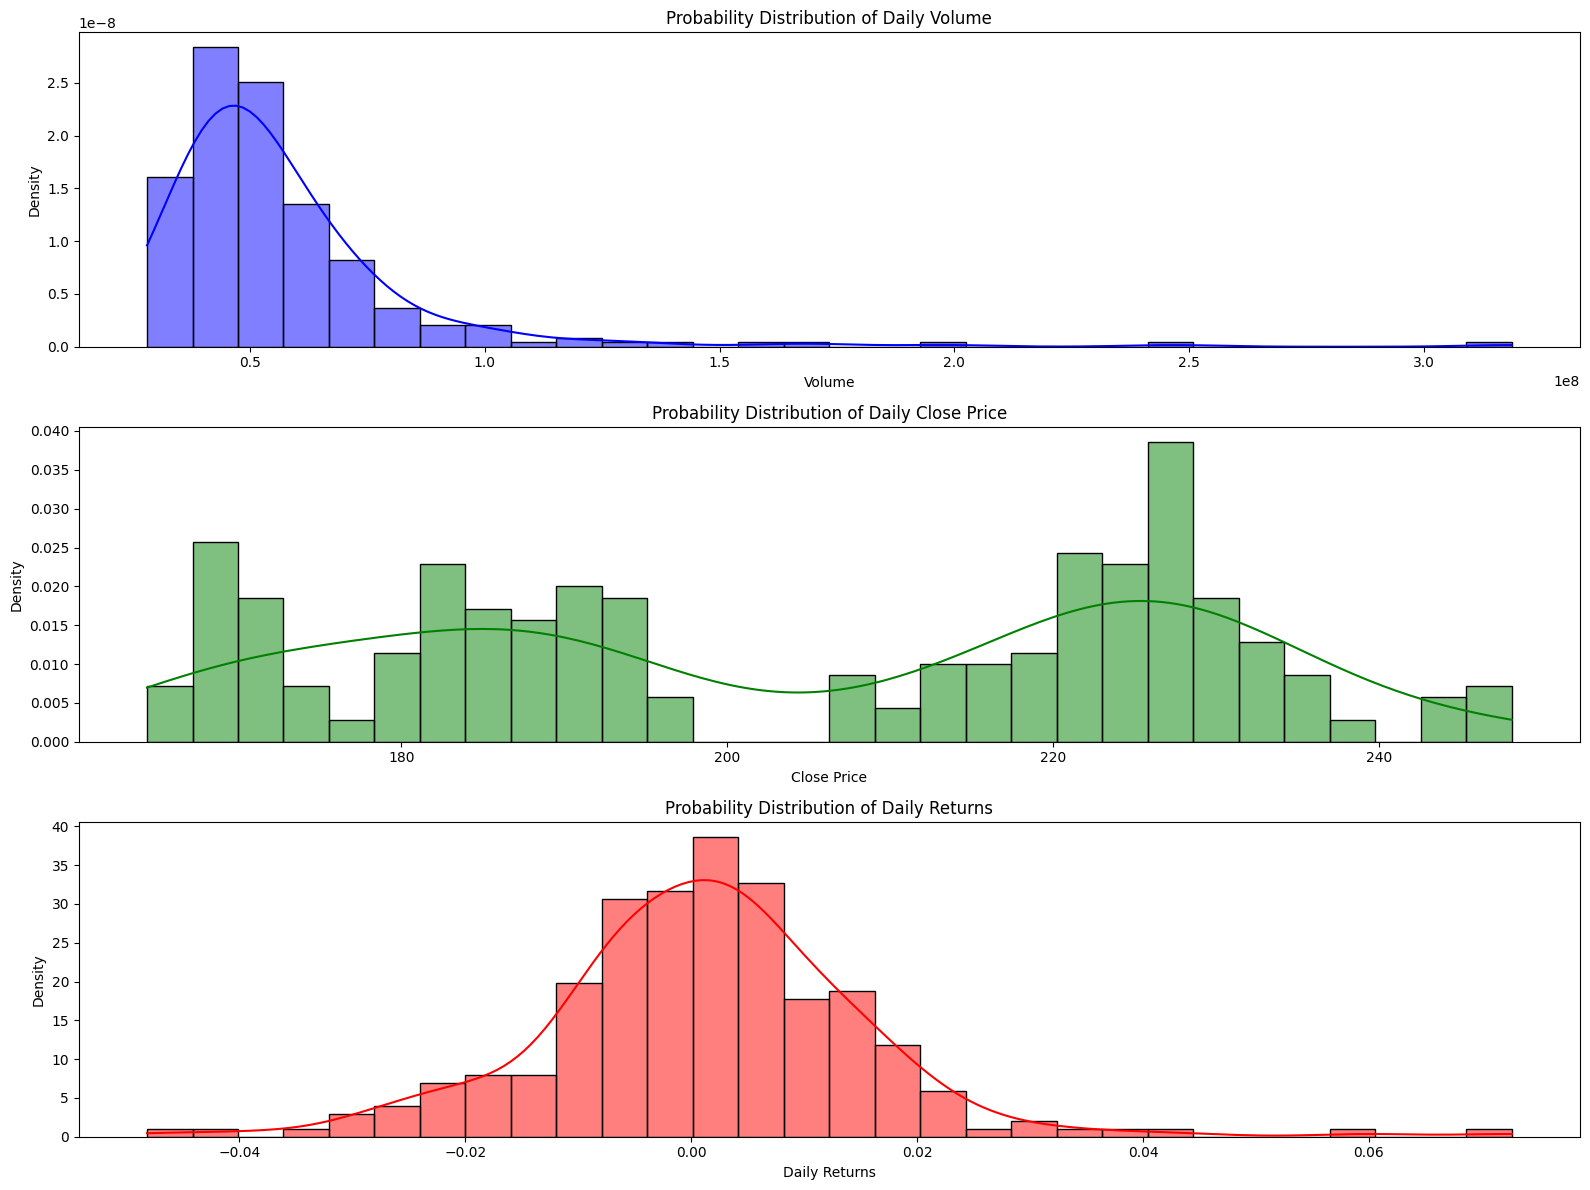

In [7]:
# Install necessary libraries
!pip install yfinance matplotlib seaborn scipy --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

# Fetch stock data
ticker = "AAPL"  # Replace with the stock ticker of your choice
stock = yf.Ticker(ticker)

# Define the time period for analysis
data = stock.history(period="1y")  # Last 1 year of data

# Add Daily Returns column
data["Daily Return"] = data["Close"].pct_change()

# Drop missing values
data.dropna(inplace=True)

# Function to calculate T-scores, Z-scores, and confidence intervals
def calculate_stats(series, confidence=0.95):
    mean = series.mean()
    std = series.std()
    n = len(series)

    # T-score
    t_score = t.ppf((1 + confidence) / 2, df=n - 1)

    # Z-score
    z_score = norm.ppf((1 + confidence) / 2)

    # Confidence interval
    margin_of_error = t_score * (std / np.sqrt(n))
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error

    return {
        "mean": mean,
        "std": std,
        "t_score": t_score,
        "z_score": z_score,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper,
    }

# Calculate stats for Daily Volume, Close Price, and Daily Returns
stats_volume = calculate_stats(data["Volume"])
stats_close = calculate_stats(data["Close"])
stats_return = calculate_stats(data["Daily Return"])

# Display calculated statistics in a clear format
print("==== Statistics for Daily Volume ====")
print(f"Mean: {stats_volume['mean']}")
print(f"Standard Deviation: {stats_volume['std']}")
print(f"T-Score: {stats_volume['t_score']}")
print(f"Z-Score: {stats_volume['z_score']}")
print(f"Confidence Interval: ({stats_volume['ci_lower']}, {stats_volume['ci_upper']})\n")

print("==== Statistics for Daily Close Price ====")
print(f"Mean: {stats_close['mean']}")
print(f"Standard Deviation: {stats_close['std']}")
print(f"T-Score: {stats_close['t_score']}")
print(f"Z-Score: {stats_close['z_score']}")
print(f"Confidence Interval: ({stats_close['ci_lower']}, {stats_close['ci_upper']})\n")

print("==== Statistics for Daily Returns ====")
print(f"Mean: {stats_return['mean']}")
print(f"Standard Deviation: {stats_return['std']}")
print(f"T-Score: {stats_return['t_score']}")
print(f"Z-Score: {stats_return['z_score']}")
print(f"Confidence Interval: ({stats_return['ci_lower']}, {stats_return['ci_upper']})\n")

# Plot probability distributions
plt.figure(figsize=(16, 12))

# Daily Volume
plt.subplot(3, 1, 1)
sns.histplot(data["Volume"], kde=True, bins=30, color="blue", stat="density")
plt.title("Probability Distribution of Daily Volume")
plt.xlabel("Volume")
plt.ylabel("Density")

# Daily Close Price
plt.subplot(3, 1, 2)
sns.histplot(data["Close"], kde=True, bins=30, color="green", stat="density")
plt.title("Probability Distribution of Daily Close Price")
plt.xlabel("Close Price")
plt.ylabel("Density")

# Daily Returns
plt.subplot(3, 1, 3)
sns.histplot(data["Daily Return"], kde=True, bins=30, color="red", stat="density")
plt.title("Probability Distribution of Daily Returns")
plt.xlabel("Daily Returns")
plt.ylabel("Density")

plt.tight_layout()
plt.show()